# Decision Tree

In [70]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [71]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Wisconsin\BreastCancer.csv', index_col=0)
df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [72]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [74]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=24)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=24)

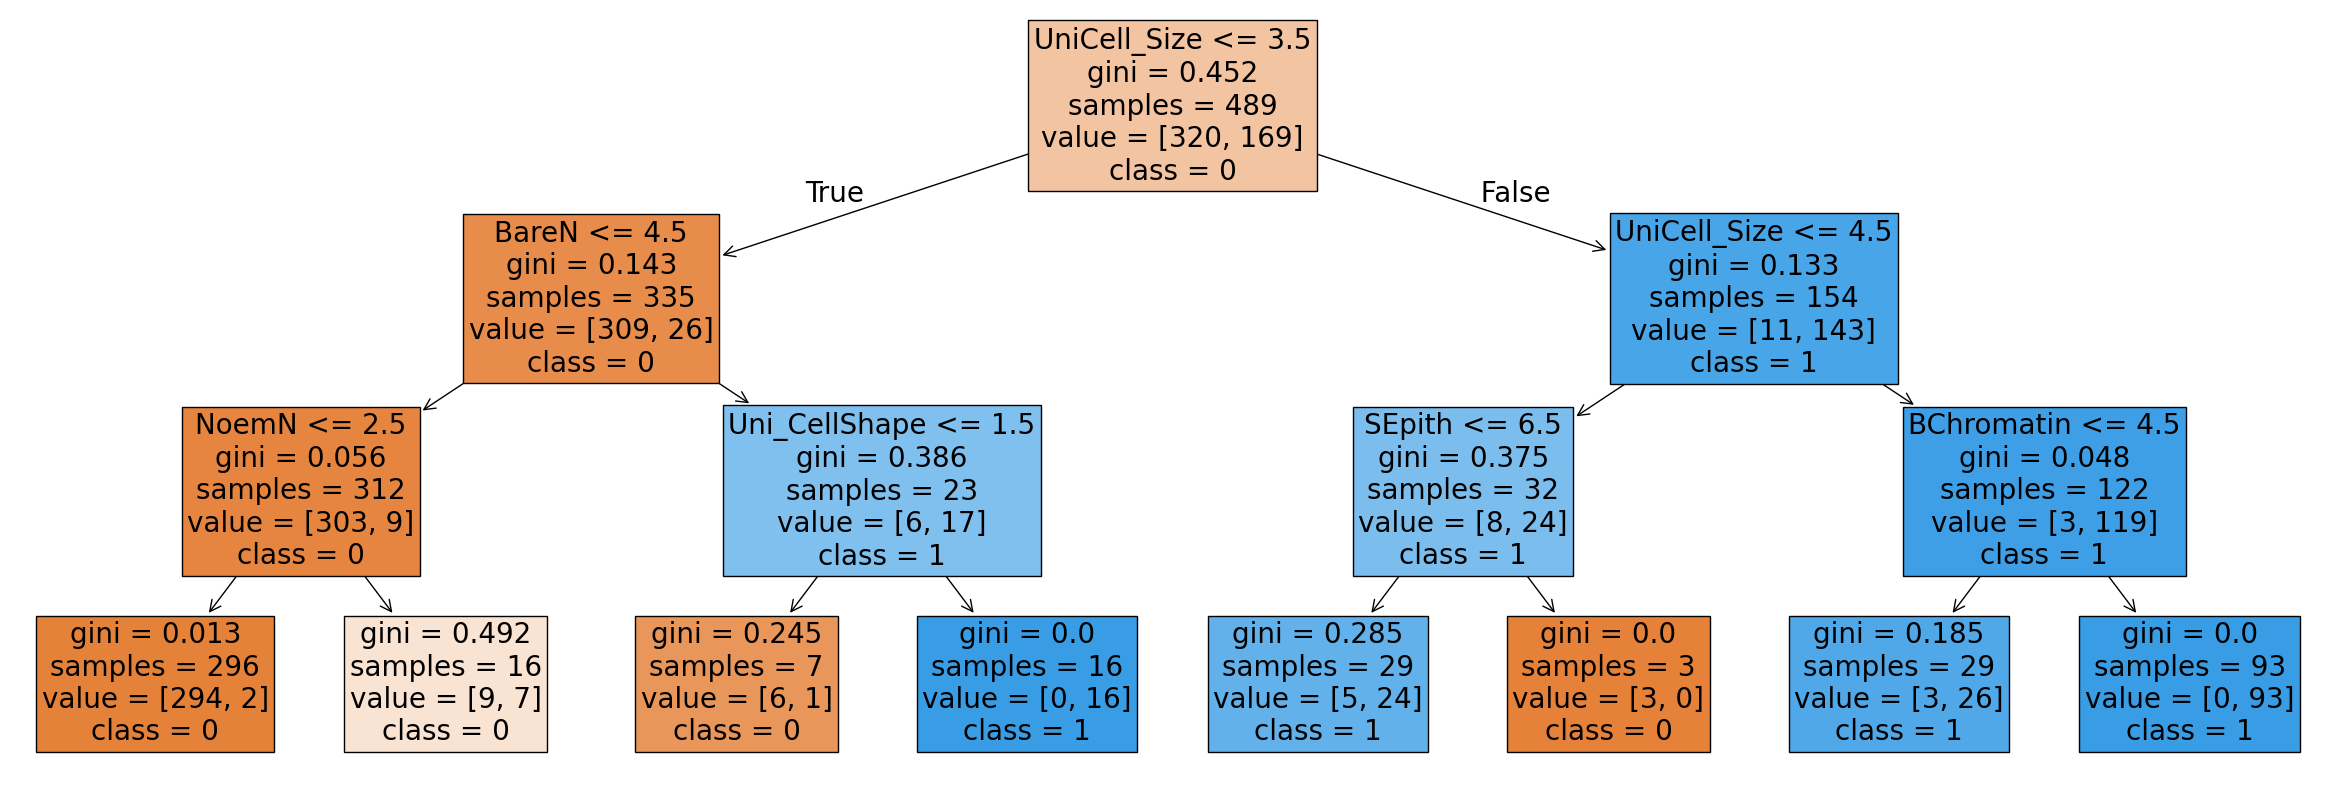

In [75]:
plt.figure(figsize=(30, 10))
plot_tree(dtc, feature_names=X.columns,  class_names=['0','1'], filled=True, fontsize=20)
plt.show()

In [76]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9571428571428572


In [77]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_prob))

0.9570249597423512


GridSearchCV

In [78]:
dtc = DecisionTreeClassifier(random_state=24)

In [ ]:
params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [1,2,3,4,5,6]}

In [80]:
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

gcv = GridSearchCV(
    estimator=dtc,
    param_grid=params,
    cv=kfold,
)


In [81]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [82]:
print(gcv.best_score_)
print(gcv.best_params_)

0.9366294971596887
{'criterion': 'entropy', 'max_depth': 6}


In [83]:
best_dtc = gcv.best_estimator_
y_pred = gcv.best_estimator_.predict(X_test)
y_pred_prob = best_dtc.predict_proba(X_test)[:, 1]

print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.9476190476190476
0.9517914653784219


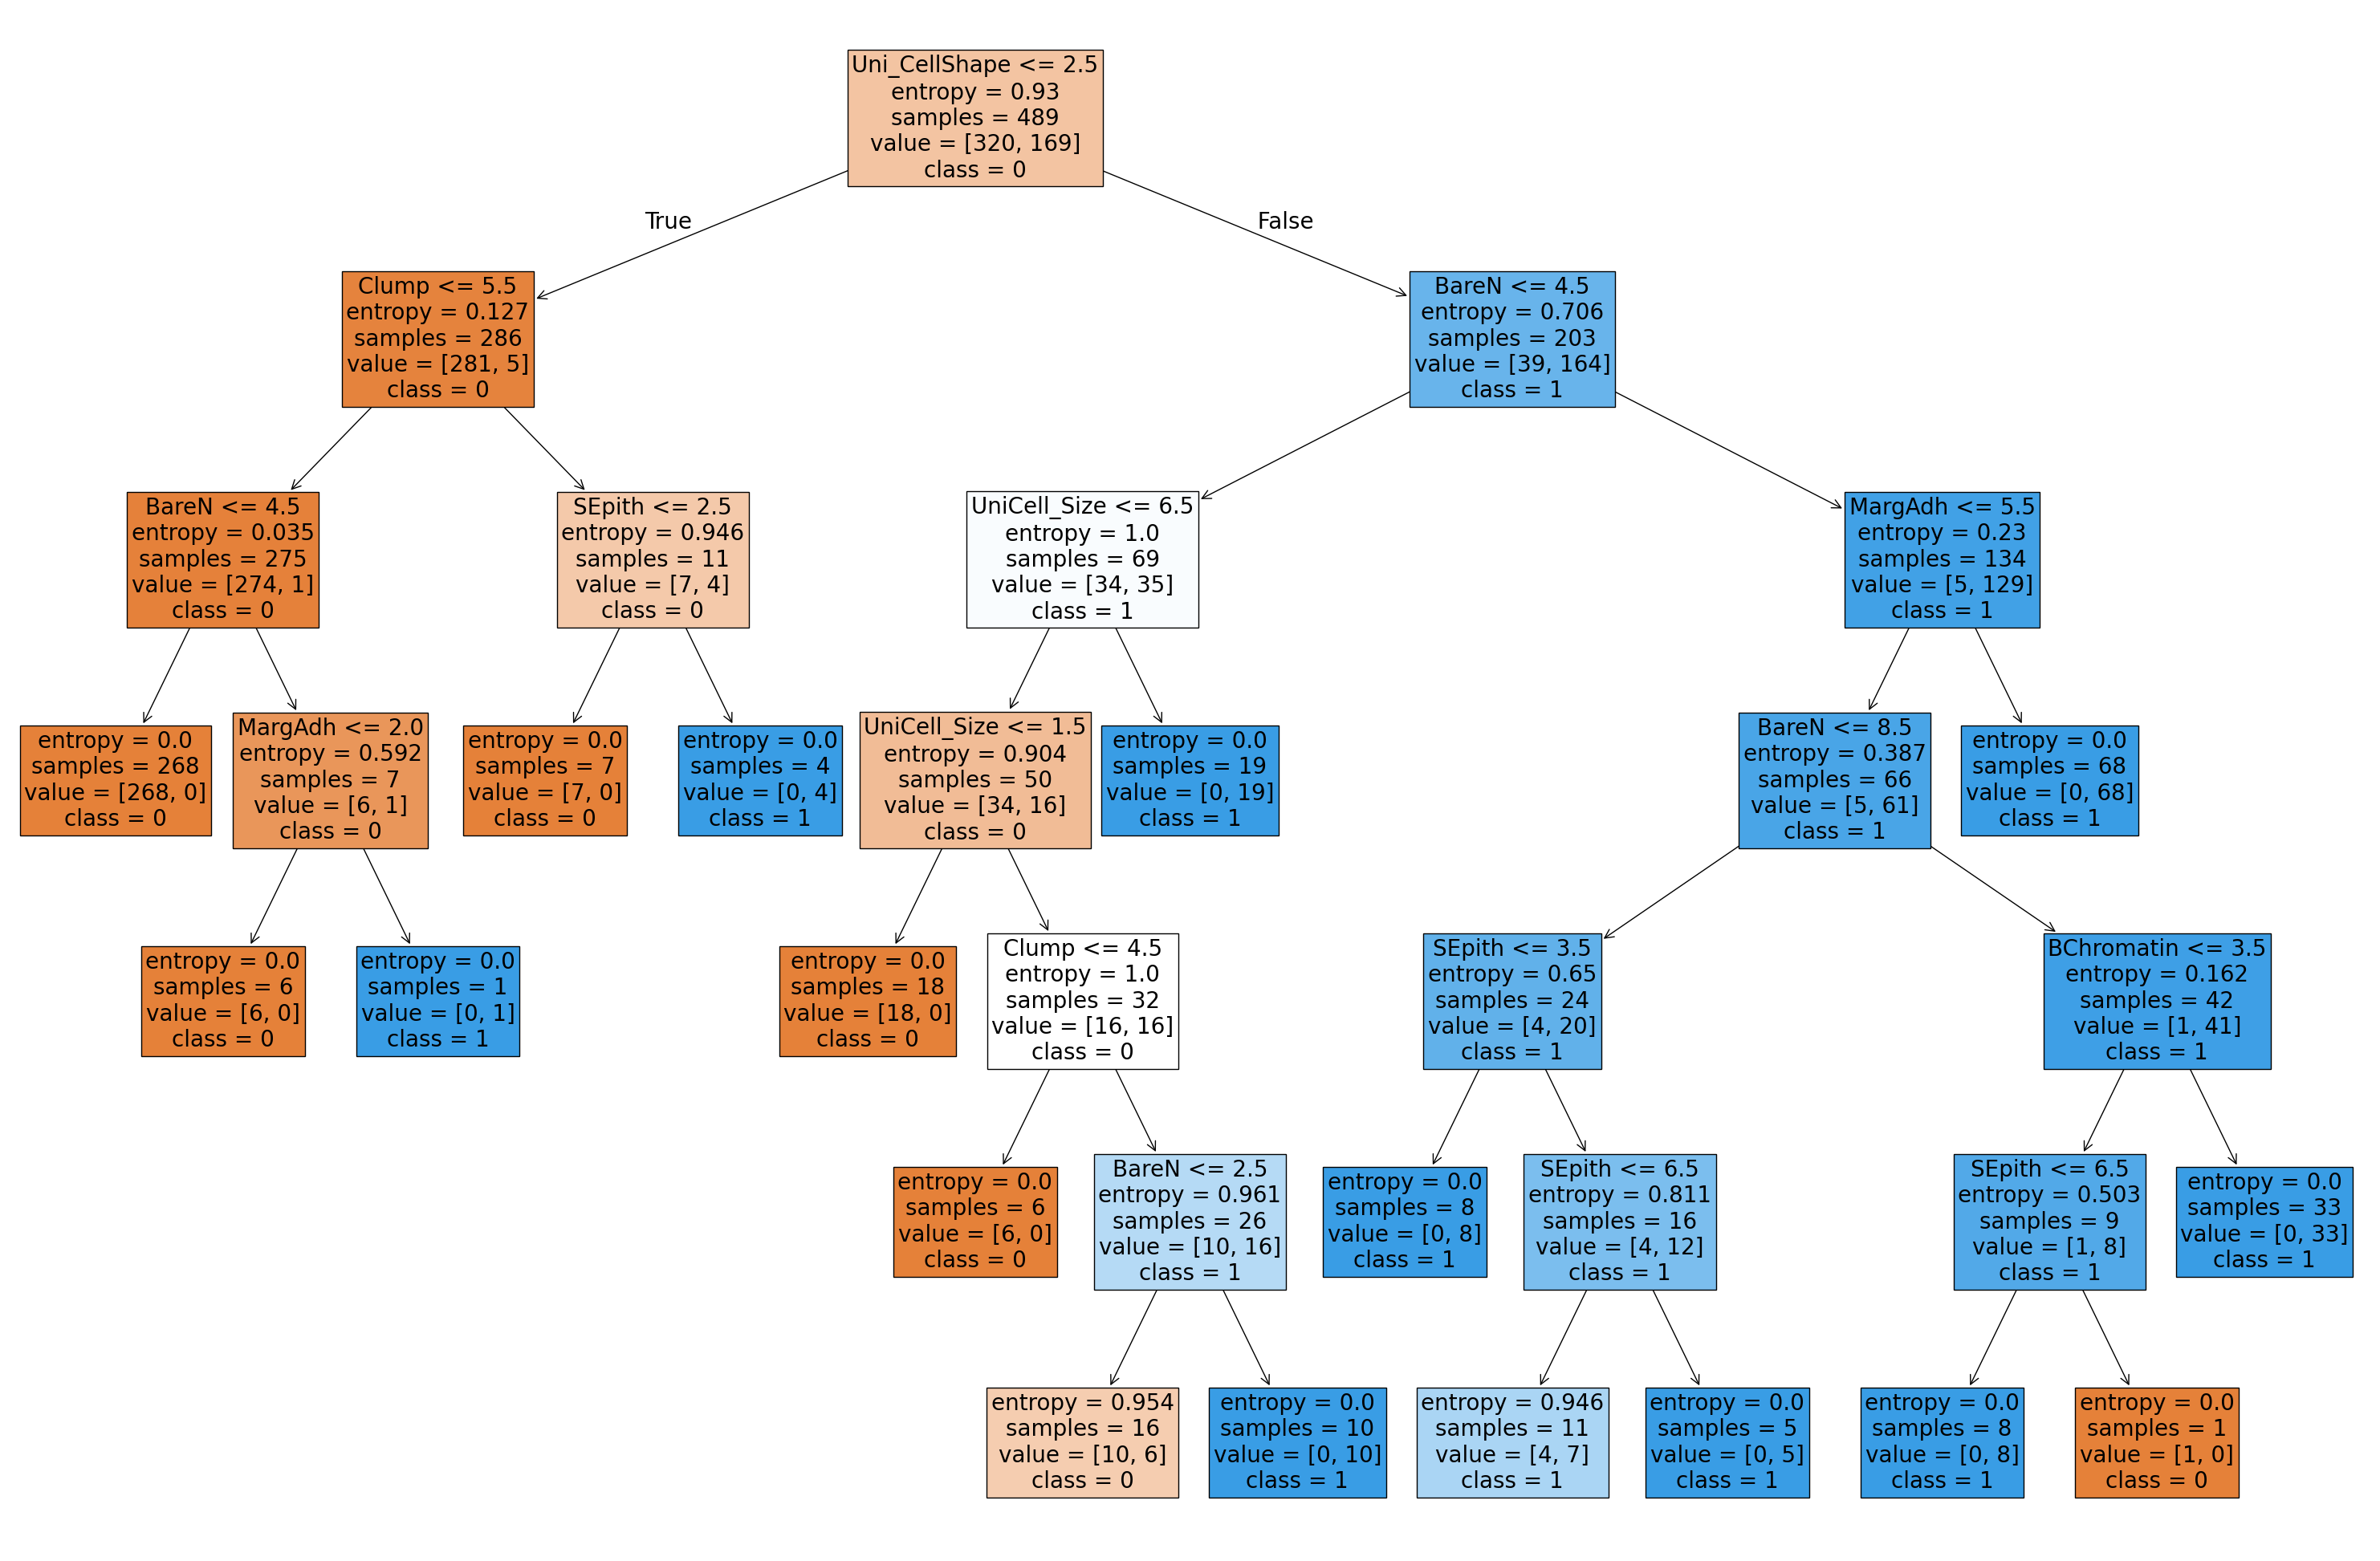

In [89]:
plt.figure(figsize=(38, 25))
plot_tree(best_dtc, feature_names=X.columns,  class_names=['0','1'], filled=True, fontsize=20)
plt.show()

In [85]:
print(best_dtc.feature_importances_)
print(X.columns)

[0.05453283 0.08619541 0.64123129 0.02189123 0.0469079  0.14390883
 0.00533252 0.         0.        ]
Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')


In [86]:
df_imp = pd.DataFrame({'features': list(X.columns),
              'importance': best_dtc.feature_importances_})
df_imp

,features,importance
0,Clump,0.054533
1,UniCell_Size,0.086195
2,Uni_CellShape,0.641231
3,MargAdh,0.021891
4,SEpith,0.046908
5,BareN,0.143909
6,BChromatin,0.005333
7,NoemN,0.000000
8,Mitoses,0.000000


In [87]:
df_imp.sort_values('importance', inplace=True)
df_imp

,features,importance
7,NoemN,0.000000
8,Mitoses,0.000000
6,BChromatin,0.005333
3,MargAdh,0.021891
4,SEpith,0.046908
0,Clump,0.054533
1,UniCell_Size,0.086195
5,BareN,0.143909
2,Uni_CellShape,0.641231


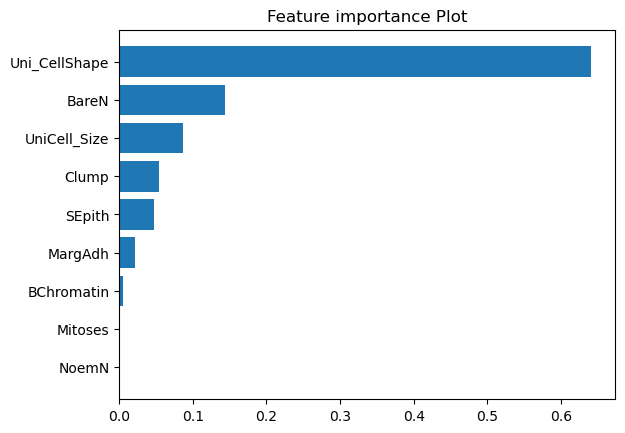

In [88]:
plt.barh(df_imp['features'], df_imp['importance'])
plt.title('Feature importance Plot')
plt.show()